In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

## Load scraped salary & performance data

In [2]:
dtype = {'背番号': str}
df = pd.read_csv('data_collection/salaries/batter.csv', index_col=0, dtype=dtype)
df.head()

,背番号,名前,年俸,打率,試合数,打席数,打数,安打,二塁打,三塁打,...,打点,三振,四球,死球,盗塁,出塁率,長打率,OPS,三振率,チーム名
0,00,曽根海成,1300.0,0.143,39.0,15.0,14.0,2.0,1.0,0.0,...,0.0,3.0,1.0,0.0,1.0,0.200,0.214,0.414,0.200,広島
1,0,上本崇司,2900.0,0.259,84.0,276.0,247.0,64.0,7.0,1.0,...,17.0,46.0,12.0,9.0,8.0,0.317,0.308,0.625,0.167,広島
2,2,田中広輔,3000.0,0.228,111.0,253.0,224.0,51.0,10.0,0.0,...,28.0,48.0,25.0,1.0,2.0,0.308,0.353,0.661,0.190,広島
3,5,西川龍馬,12000.0,0.305,109.0,443.0,416.0,127.0,20.0,1.0,...,56.0,52.0,21.0,1.0,7.0,0.337,0.423,0.760,0.117,広島
4,7,堂林翔太,5000.0,0.273,100.0,284.0,260.0,71.0,13.0,0.0,...,35.0,72.0,19.0,0.0,1.0,0.323,0.462,0.784,0.254,広島


In [3]:
df.columns

Index(['背番号', '名前', '年俸', '打率', '試合数', '打席数', '打数', '安打', '二塁打', '三塁打', '本塁打',
       '塁打数', '得点', '打点', '三振', '四球', '死球', '盗塁', '出塁率', '長打率', 'OPS', '三振率',
       'チーム名'],
      dtype='object')

In [4]:
# convert column names into English
col_eng = [
    'uniform_num','name', 'ann_salary_x10000', 'average', 'games', 'plate_appearance', 'at_bat', 'hit', '2B', '3B', 'HR', 'total_bases', 'run_scored', 'RBI', 'strikeout', 'walk', 'hit_by_pitch', 'stolen_base', 'on_base_pct', 'slugging_pct', 'OPS', 'k/9', 'team_name'
]
df.columns = col_eng
df.columns

Index(['uniform_num', 'name', 'ann_salary_x10000', 'average', 'games',
       'plate_appearance', 'at_bat', 'hit', '2B', '3B', 'HR', 'total_bases',
       'run_scored', 'RBI', 'strikeout', 'walk', 'hit_by_pitch', 'stolen_base',
       'on_base_pct', 'slugging_pct', 'OPS', 'k/9', 'team_name'],
      dtype='object')

## Cost per win analysis

In [5]:
tot_salaries = df.groupby('team_name')['ann_salary_x10000'].sum()
tot_salaries

team_name
DeNA      181130.0
オリックス     137090.0
ソフトバンク    295000.0
ヤクルト      249700.0
ロッテ       125690.0
中日        141615.0
巨人        279010.0
広島        154650.0
日本ハム       86435.0
楽天        179160.0
西武        181240.0
阪神        135440.0
Name: ann_salary_x10000, dtype: float64

In [6]:
standing_2023 = pd.read_csv('data_collection/standings/2023_final_standings.csv')
standing_2023.head()

,ID,Year,Season,HomeTeam,VisitorTeam,Matchday,GameCD,League,Ranking,TeamCD,...,Homerun,StolenBase,BattingAverage,EarnedRunAverage,RestGame,Winner_Magic,POLastRanking,RankShiftF,UpdatedAt,CreatedAt
0,40240,2023,NaN,NaN,NaN,20231010,NaN,Pacific,1,11,...,109,52,0.250,2.73,0,0,NaN,0,2023-10-10T12:48:24.000Z,2023-10-10T12:48:24.000Z
1,40241,2023,NaN,NaN,NaN,20231010,NaN,Pacific,2,9,...,100,73,0.239,3.40,0,-1,NaN,1,2023-10-10T12:48:24.000Z,2023-10-10T12:48:24.000Z
2,40242,2023,NaN,NaN,NaN,20231010,NaN,Pacific,3,12,...,104,73,0.248,3.27,0,-1,NaN,2,2023-10-10T12:48:24.000Z,2023-10-10T12:48:24.000Z
3,40243,2023,NaN,NaN,NaN,20231010,NaN,Pacific,4,376,...,104,102,0.244,3.52,0,-1,NaN,0,2023-10-10T12:48:24.000Z,2023-10-10T12:48:24.000Z
4,40244,2023,NaN,NaN,NaN,20231010,NaN,Pacific,5,7,...,90,80,0.233,2.93,0,-1,NaN,0,2023-10-10T12:48:24.000Z,2023-10-10T12:48:24.000Z


In [7]:
standing_2023.columns

Index(['ID', 'Year', 'Season', 'HomeTeam', 'VisitorTeam', 'Matchday', 'GameCD',
       'League', 'Ranking', 'TeamCD', 'ShortName_Team', 'Game', 'Win', 'Lose',
       'Draw', 'WinningPercentage', 'GameBehind', 'GameBehindTop', 'Run',
       'PointLost', 'Homerun', 'StolenBase', 'BattingAverage',
       'EarnedRunAverage', 'RestGame', 'Winner_Magic', 'POLastRanking',
       'RankShiftF', 'UpdatedAt', 'CreatedAt'],
      dtype='object')

In [8]:
# limit to necessary columns
standing_2023 = standing_2023[['ShortName_Team', 'League', 'Year', 'Ranking', 'Game', 'Win', 'Lose', 'Draw']].copy()
standing_2023.rename(columns={'ShortName_Team':'Team'}, inplace=True)
standing_2023['Total_salary'] = standing_2023['Team'].map(tot_salaries)
standing_2023['Cost_per_win'] = standing_2023['Total_salary'] / standing_2023['Win']
standing_2023

,Team,League,Year,Ranking,Game,Win,Lose,Draw,Total_salary,Cost_per_win
0,オリックス,Pacific,2023,1,143,86,53,4,137090.0,1594.069767
1,ロッテ,Pacific,2023,2,143,70,68,5,125690.0,1795.571429
2,ソフトバンク,Pacific,2023,3,143,71,69,3,295000.0,4154.929577
3,楽天,Pacific,2023,4,143,70,71,2,179160.0,2559.428571
4,西武,Pacific,2023,5,143,65,77,1,181240.0,2788.307692
5,日本ハム,Pacific,2023,6,143,60,82,1,86435.0,1440.583333
6,阪神,Central,2023,1,143,85,53,5,135440.0,1593.411765
7,広島,Central,2023,2,143,74,65,4,154650.0,2089.864865
8,DeNA,Central,2023,3,143,74,66,3,181130.0,2447.702703
9,巨人,Central,2023,4,143,71,70,2,279010.0,3929.718310


Text(0, 0.5, 'Cost per win (10,000 yen)')

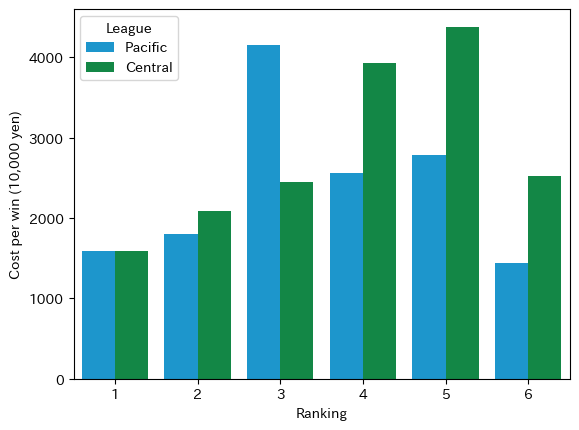

In [9]:
hue_colors = {'Central': '#009A44', 'Pacific': '#00A1E9'} # official theme colors
ax = sns.barplot(x='Ranking', y='Cost_per_win', data=standing_2023, hue='League', palette=hue_colors)
ax.set_ylabel('Cost per win (10,000 yen)')

Observation
* First place teams on both leagues have almost the exact same cost per win.
* There seems to be upward trend for 2nd to 5th place, but 6th place teams have lower cost per win for both leagues
* Does this mean the 6th place teams are at lower rank because they have low budget?

## => Analysis for past 5 years (2019-2023 seasons)


In [10]:
start_yr = 2019
end_yr = 2023

In [11]:
# get total annual salaries
dfs = []
for year in range(start_yr, end_yr + 1):
    tot_salaries = pd.Series()
    for position in ['batter', 'pitcher']:
        df = pd.read_csv(f'data_collection/salaries/{year}_{position}.csv', index_col=0)
        tot_salaries = tot_salaries.add(df.groupby('チーム')['年俸'].sum(), fill_value=0)

    df = tot_salaries.reset_index()
    df.columns = ['Team', 'Tot_salaries']
    df['Year'] = year

    dfs.append(df)

salaries_df = pd.concat(dfs, ignore_index=True)

In [12]:
salaries_df

,Team,Tot_salaries,Year
0,DeNA,300965,2019
1,オリックス,262670,2019
2,ソフトバンク,548420,2019
3,ヤクルト,317450,2019
4,ロッテ,264225,2019
5,中日,242273,2019
6,巨人,536465,2019
7,広島,300355,2019
8,日本ハム,282500,2019
9,楽天,311340,2019


In [13]:
# get final standings
dfs = []
for year in range(start_yr, end_yr + 1):
    df = pd.read_csv(f'data_collection/standings/{year}_final_standings.csv')
    df = df[['ShortName_Team', 'League', 'Year', 'Ranking', 'Game', 'Win', 'Lose', 'Draw']].copy()
    df.rename(columns={'ShortName_Team':'Team'}, inplace=True)
    dfs.append(df)

standings_df = pd.concat(dfs, ignore_index=True)
# fix full-width character error
standings_df['Team'] = standings_df['Team'].replace('ＤｅＮＡ', 'DeNA')

In [14]:
standings_df

,Team,League,Year,Ranking,Game,Win,Lose,Draw
0,西武,Pacific,2019,1,143,80,62,1
1,ソフトバンク,Pacific,2019,2,143,76,62,5
2,楽天,Pacific,2019,3,143,71,68,4
3,ロッテ,Pacific,2019,4,143,69,70,4
4,日本ハム,Pacific,2019,5,143,65,73,5
5,オリックス,Pacific,2019,6,143,61,75,7
6,巨人,Central,2019,1,143,77,64,2
7,DeNA,Central,2019,2,143,71,69,3
8,阪神,Central,2019,3,143,69,68,6
9,広島,Central,2019,4,143,70,70,3


In [15]:
cpw_df = pd.merge(salaries_df, standings_df, on=['Team', 'Year'])
cpw_df['Cost_per_win'] = cpw_df['Tot_salaries'] / cpw_df['Win']
cpw_df

,Team,Tot_salaries,Year,League,Ranking,Game,Win,Lose,Draw,Cost_per_win
0,DeNA,300965,2019,Central,2,143,71,69,3,4238.943662
1,オリックス,262670,2019,Pacific,6,143,61,75,7,4306.065574
2,ソフトバンク,548420,2019,Pacific,2,143,76,62,5,7216.052632
3,ヤクルト,317450,2019,Central,6,143,59,82,2,5380.508475
4,ロッテ,264225,2019,Pacific,4,143,69,70,4,3829.347826
5,中日,242273,2019,Central,5,143,68,73,2,3562.838235
6,巨人,536465,2019,Central,1,143,77,64,2,6967.077922
7,広島,300355,2019,Central,4,143,70,70,3,4290.785714
8,日本ハム,282500,2019,Pacific,5,143,65,73,5,4346.153846
9,楽天,311340,2019,Pacific,3,143,71,68,4,4385.070423


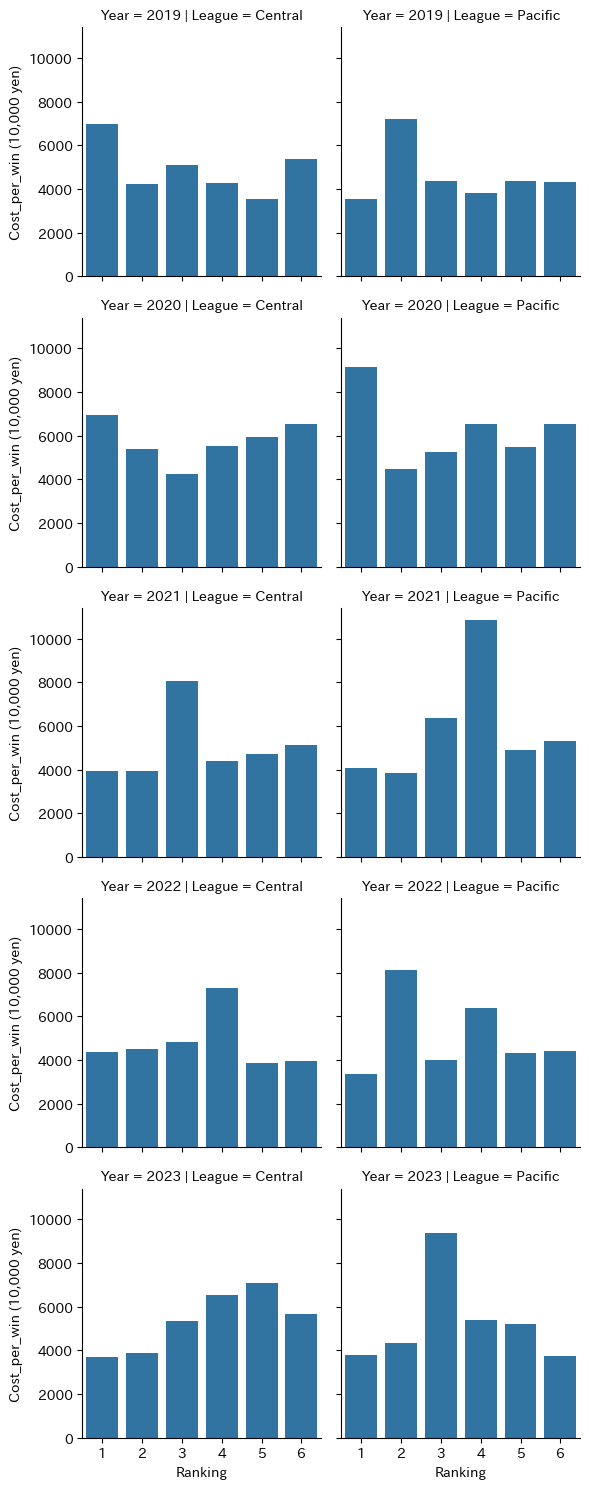

In [16]:
# barplot
bar = sns.FacetGrid(cpw_df, col='League', row='Year')
bar.map_dataframe(sns.barplot, x='Ranking', y='Cost_per_win')
bar.set_ylabels('Cost_per_win (10,000 yen)')

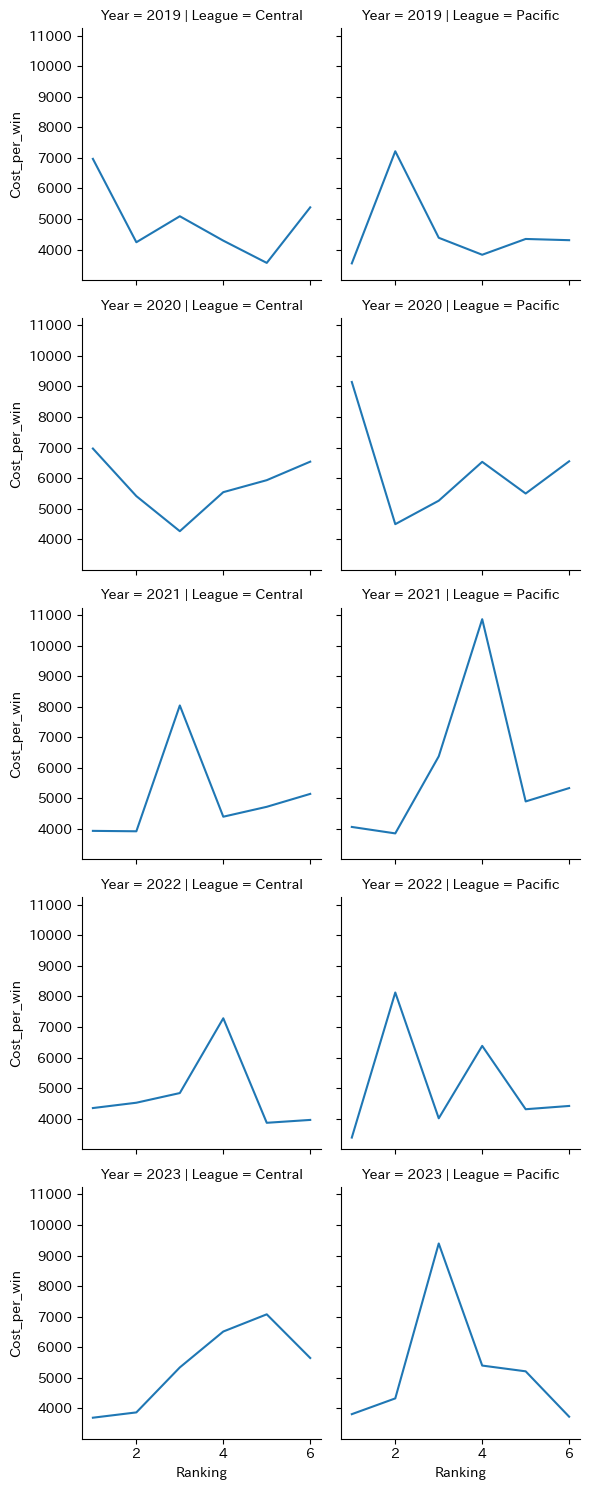

In [17]:
# lineplot
line = sns.FacetGrid(cpw_df, col='League', row='Year')
line.map_dataframe(sns.lineplot, x='Ranking', y='Cost_per_win')
bar.set_ylabels('Cost_per_win (10,000 yen)')

#### Observation

In general, there seems to be a change in trend between 2019-2020 and 2021-2023. 

For years 2019-202, line graphs have a vally-like shape where top and bottom ranked teams have high cost per win. On the other hand, in 2021-2023, there is a mountain shape with peak in the middle.

One possible reason for change in trend is the COVID pandemic, e.g. owner companies alternated budgeting for their baseball teams.

#### Limitations
The website where I scraped the salary data from didn't list a specific source, and it mentioned the salary for each player was approximate. Therefore, the accuracy of cost per win value is unknown. We also only looked at past five years, but there may be a bigger trend if we look at logner period of time.

Finally, we did not apply any statistical measures to make this project simple. So all analysis or interpretation may be biased, and observed values may have occurred by chance.

#### Conclusion
The cost per win analysis shows that there isn't a strong connection between teams' cost per win and its rankings. In other words, the team's budget does not have a direct effect on its performance.